# Data Science Intern Assignment 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,metrics,neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

# Titanic Dataset

In [ ]:
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Meyer, Mr. Edgar Joseph",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Class 0: 549
Class 1: 342
Proportion: 1.61 : 1


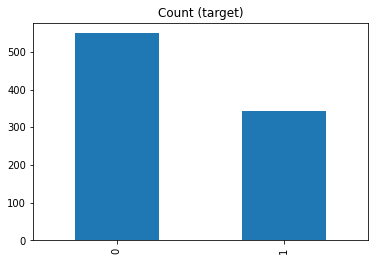

In [ ]:
target_count = df.Survived.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Data Pre-Processing and Cleaning

In [ ]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked','Survived']]
X1 = df1[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
X.dropna(inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
le = LabelEncoder()
X.Embarked = le.fit_transform(X.Embarked)
X.Sex = le.fit_transform(X.Sex)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
y = X[['Survived']]
X.drop('Survived',axis = 1,inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.10992712 0.27275834 0.27059778 0.04279403 0.04264147 0.23334563
 0.02793562]


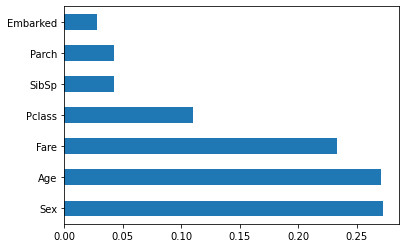

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(7,'Score'))  

      Specs        Score
5      Fare  4081.679420
1       Sex    74.621277
2       Age    34.246098
0    Pclass    28.243213
4     Parch    10.883500
6  Embarked     8.956375
3     SibSp     0.288691


In [ ]:
X['Age'] = MinMaxScaler().fit_transform(np.array(X['Age']).reshape(-1,1))
X['Fare'] = MinMaxScaler().fit_transform(np.array(X['Fare']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X = X[['Fare','Sex','Age','Pclass']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation = 'relu'),
    #tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
                         ])

In [ ]:
#sgd = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['AUC'])

In [ ]:
model.fit(X_train,y_train,epochs = 15)

Epoch 1/15
17/17 [==============================] - 1s 2ms/step - loss: 0.6669 - auc: 0.6076
Epoch 2/15
17/17 [==============================] - 0s 2ms/step - loss: 0.6282 - auc: 0.7630
Epoch 3/15
17/17 [==============================] - 0s 2ms/step - loss: 0.6137 - auc: 0.7816
Epoch 4/15
17/17 [==============================] - 0s 2ms/step - loss: 0.5999 - auc: 0.7992
Epoch 5/15
17/17 [==============================] - 0s 2ms/step - loss: 0.5862 - auc: 0.8095
Epoch 6/15
17/17 [==============================] - 0s 2ms/step - loss: 0.5729 - auc: 0.8116
Epoch 7/15
17/17 [==============================] - 0s 2ms/step - loss: 0.5604 - auc: 0.8135
Epoch 8/15
17/17 [==============================] - 0s 2ms/step - loss: 0.5488 - auc: 0.8170
Epoch 9/15
17/17 [==============================] - 0s 2ms/step - loss: 0.5404 - auc: 0.8156
Epoch 10/15
17/17 [==============================] - 0s 2ms/step - loss: 0.5307 - auc: 0.8217
Epoch 11/15
17/17 [==============================] - 0s 2ms/step - lo

In [ ]:
loss,acc = model.evaluate(X_test,y_test,verbose= 1)
print(acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.4871 - auc: 0.8491
0.8490711450576782


In [ ]:
pred = model.predict_classes(X_test)
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

ROC AUC: 0.776961
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       102
           1       0.74      0.75      0.75        76

    accuracy                           0.78       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.78      0.78      0.78       178

	Confusion Matrix
[[82 20]
 [19 57]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
clf = neighbors.KNeighborsClassifier()
para_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,15,20],'weights':['uniform','distance']}
clf_g = GridSearchCV(clf,para_grid,cv=5)
clf_g.fit(X_train,y_train)
print(clf_g.best_params_)
pred = clf_g.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

{'n_neighbors': 8, 'weights': 'uniform'}
ROC AUC: 0.776574
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       102
           1       0.86      0.63      0.73        76

    accuracy                           0.80       178
   macro avg       0.81      0.78      0.78       178
weighted avg       0.81      0.80      0.79       178

	Confusion Matrix
[[94  8]
 [28 48]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
clf = Pipeline([('clf', DecisionTreeClassifier(random_state=101))])  

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] 
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid = [{ 'clf__class_weight': class_weight
                ,'clf__criterion': criterion
                ,'clf__splitter': splitter
                ,'clf__max_depth': max_depth
                ,'clf__min_samples_leaf': min_samples_leaf
            }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

gs.fit(X_train,y_train)

pred = gs.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC AUC: 0.812951
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       102
           1       0.81      0.76      0.78        76

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

	Confusion Matrix
[[88 14]
 [18 58]]


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.7s finished


In [ ]:
clf = Pipeline([('clf', GradientBoostingClassifier(random_state=101))])  

learning_rate =  [1e-02] 
n_estimators= [400]
max_depth = [10]
n_comp = [2, 3, 4, 5]

param_grid = [{'clf__learning_rate': learning_rate
                ,'clf__max_depth': max_depth
                ,'clf__n_estimators' : n_estimators 
             }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs.fit(X_train,y_train)

pred = gs.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC: 0.801471
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       102
           1       0.79      0.75      0.77        76

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

	Confusion Matrix
[[87 15]
 [19 57]]


In [ ]:
clf = Pipeline([('clf', RandomForestClassifier(random_state=101))])  

criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1]

param_grid =[{ 'clf__class_weight': class_weight,
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      ,'clf__min_samples_leaf': min_samples_leaf
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1,n_jobs=-1)
gs.fit(X_train,y_train)

pred = gs.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   55.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


ROC AUC: 0.803148
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       102
           1       0.78      0.76      0.77        76

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

	Confusion Matrix
[[86 16]
 [18 58]]


In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
pred = LR.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

ROC AUC: 0.506579
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       102
           1       1.00      0.01      0.03        76

    accuracy                           0.58       178
   macro avg       0.79      0.51      0.38       178
weighted avg       0.76      0.58      0.43       178

	Confusion Matrix
[[102   0]
 [ 75   1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

ROC AUC: 0.781863
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       102
           1       0.75      0.75      0.75        76

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

	Confusion Matrix
[[83 19]
 [19 57]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
X1.dropna(inplace = True)
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    object 
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.7+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
le = LabelEncoder()
X1.Embarked = le.fit_transform(X1.Embarked)
X1.Sex = le.fit_transform(X1.Sex)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
X1['Age'] = MinMaxScaler().fit_transform(np.array(X1['Age']).reshape(-1,1))
X1['Fare'] = MinMaxScaler().fit_transform(np.array(X1['Fare']).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X1 = X1[['Fare','Sex','Age','Pclass']]

In [ ]:
pred = model.predict_classes(X1)
pred = pred.reshape(pred.shape[0])
pred = pd.Series(pred)
pred.value_counts()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0    202
1    129
dtype: int64

In [ ]:
pred = gs.predict(X1)
pred = pred.reshape(pred.shape[0])
pred = pd.Series(pred)
pred.value_counts()

0    210
1    121
dtype: int64